## Classification of primary fuel type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score ,roc_auc_score,roc_curve, mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()#checking for null values
#dataset has a lot null values
##let's drop columns which have more than 50% null values as treating them will lead to wrong prediction
#other_fuel1,other_fuel2,other_fuel3,owner,wepp_id,estimated_generation_gwh have most of null entries.

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [4]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [5]:
df.info()#checking datatypes and 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      889 non-null    object 
 12  year_of_capacity_data   520 non-null    float64
 13  generation_gwh_2013     384 non-null    float64
 14  generation_gwh_2014     401 non-null    fl

In [6]:
#since,geolocation_source has least null values and mostly filled with same category we will replace nan with mode.
df.geolocation_source.value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [7]:
df['geolocation_source'].fillna(df['geolocation_source'].mode(),inplace=True)
#lattitude, longitude,commissionning year,year of capacity data,generation gwh in different years have crucial data and filling 
#those nan values will lead to wrong prediction hence we will drop nan entries.

In [8]:
df.dropna(inplace=True)
df.reset_index()

,index,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.74700,886.004428,663.774500,Central Electricity Authority
1,4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,Central Electricity Authority
2,5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,821.798000,1153.421000,1208.85200,1175.765000,1147.913000,Central Electricity Authority
3,6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,147.568450,157.558250,152.19520,61.421350,89.629600,Central Electricity Authority
4,7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,696.738800,674.391100,721.33520,675.724400,679.594950,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,883,IND,India,VISHNU PRAYAG,IND0000505,400.0,30.5669,79.5468,Hydro,2006.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,435.710500,1806.860300,1204.59675,2031.839750,2150.095500,Central Electricity Authority
368,890,IND,India,WANAKBORI,IND0000507,1470.0,22.8725,73.3588,Coal,1986.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000,Central Electricity Authority
369,891,IND,India,WARDHA WARORA(Sai Wardha Power),IND0000508,540.0,20.2727,78.9792,Coal,2010.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2311.320000,1045.820000,1651.15890,1229.480000,999.170000,Central Electricity Authority
370,894,IND,India,WY.CANAL A -D,IND0000510,62.4,30.3033,77.5684,Hydro,1991.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,203.975000,184.453100,183.00000,204.253600,175.866250,Central Electricity Authority


In [9]:
#country and country_long have same entry throughout the data set hence drop both as they will not effect anything.
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [10]:
df.primary_fuel.unique()

array(['Gas', 'Coal', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

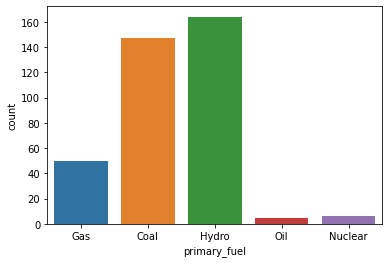

In [11]:
sns.countplot(df.primary_fuel)
#hydro fuel is used by maxplants and oil is used by minimum plants

In [12]:
#converting all categorical data into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


df['name']=le.fit_transform(df['name'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])


In [13]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.0,372.0,372.0,372.0,372.000000,372.000000,372.000000,372.000000,372.000000,372.0
mean,185.500000,185.500000,611.541508,21.798009,79.188803,1.118280,1995.220430,0.0,0.0,0.0,2018.0,2373.981668,2576.379808,2610.943872,2581.937205,2622.000194,0.0
std,107.531391,107.531391,729.914163,6.732487,5.100806,1.005102,16.225328,0.0,0.0,0.0,0.0,3835.136325,4120.763588,4389.308973,4371.423699,4415.992618,0.0
min,0.000000,0.000000,27.000000,8.531900,68.644700,0.000000,1927.000000,0.0,0.0,0.0,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,92.750000,92.750000,113.562500,16.929350,75.976000,0.000000,1986.000000,0.0,0.0,0.0,2018.0,252.292200,265.679112,247.282471,210.012925,190.248975,0.0
50%,185.500000,185.500000,350.715000,22.358100,77.857550,1.000000,2000.000000,0.0,0.0,0.0,2018.0,886.788775,926.055500,812.288550,825.519000,804.900275,0.0
75%,278.250000,278.250000,892.500000,26.646750,82.128375,2.000000,2009.000000,0.0,0.0,0.0,2018.0,2963.536500,3140.228525,3326.156475,3267.591188,3200.063638,0.0
max,371.000000,371.000000,4760.000000,34.490300,95.408000,4.000000,2017.000000,0.0,0.0,0.0,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


In [14]:
df.shape

(372, 17)

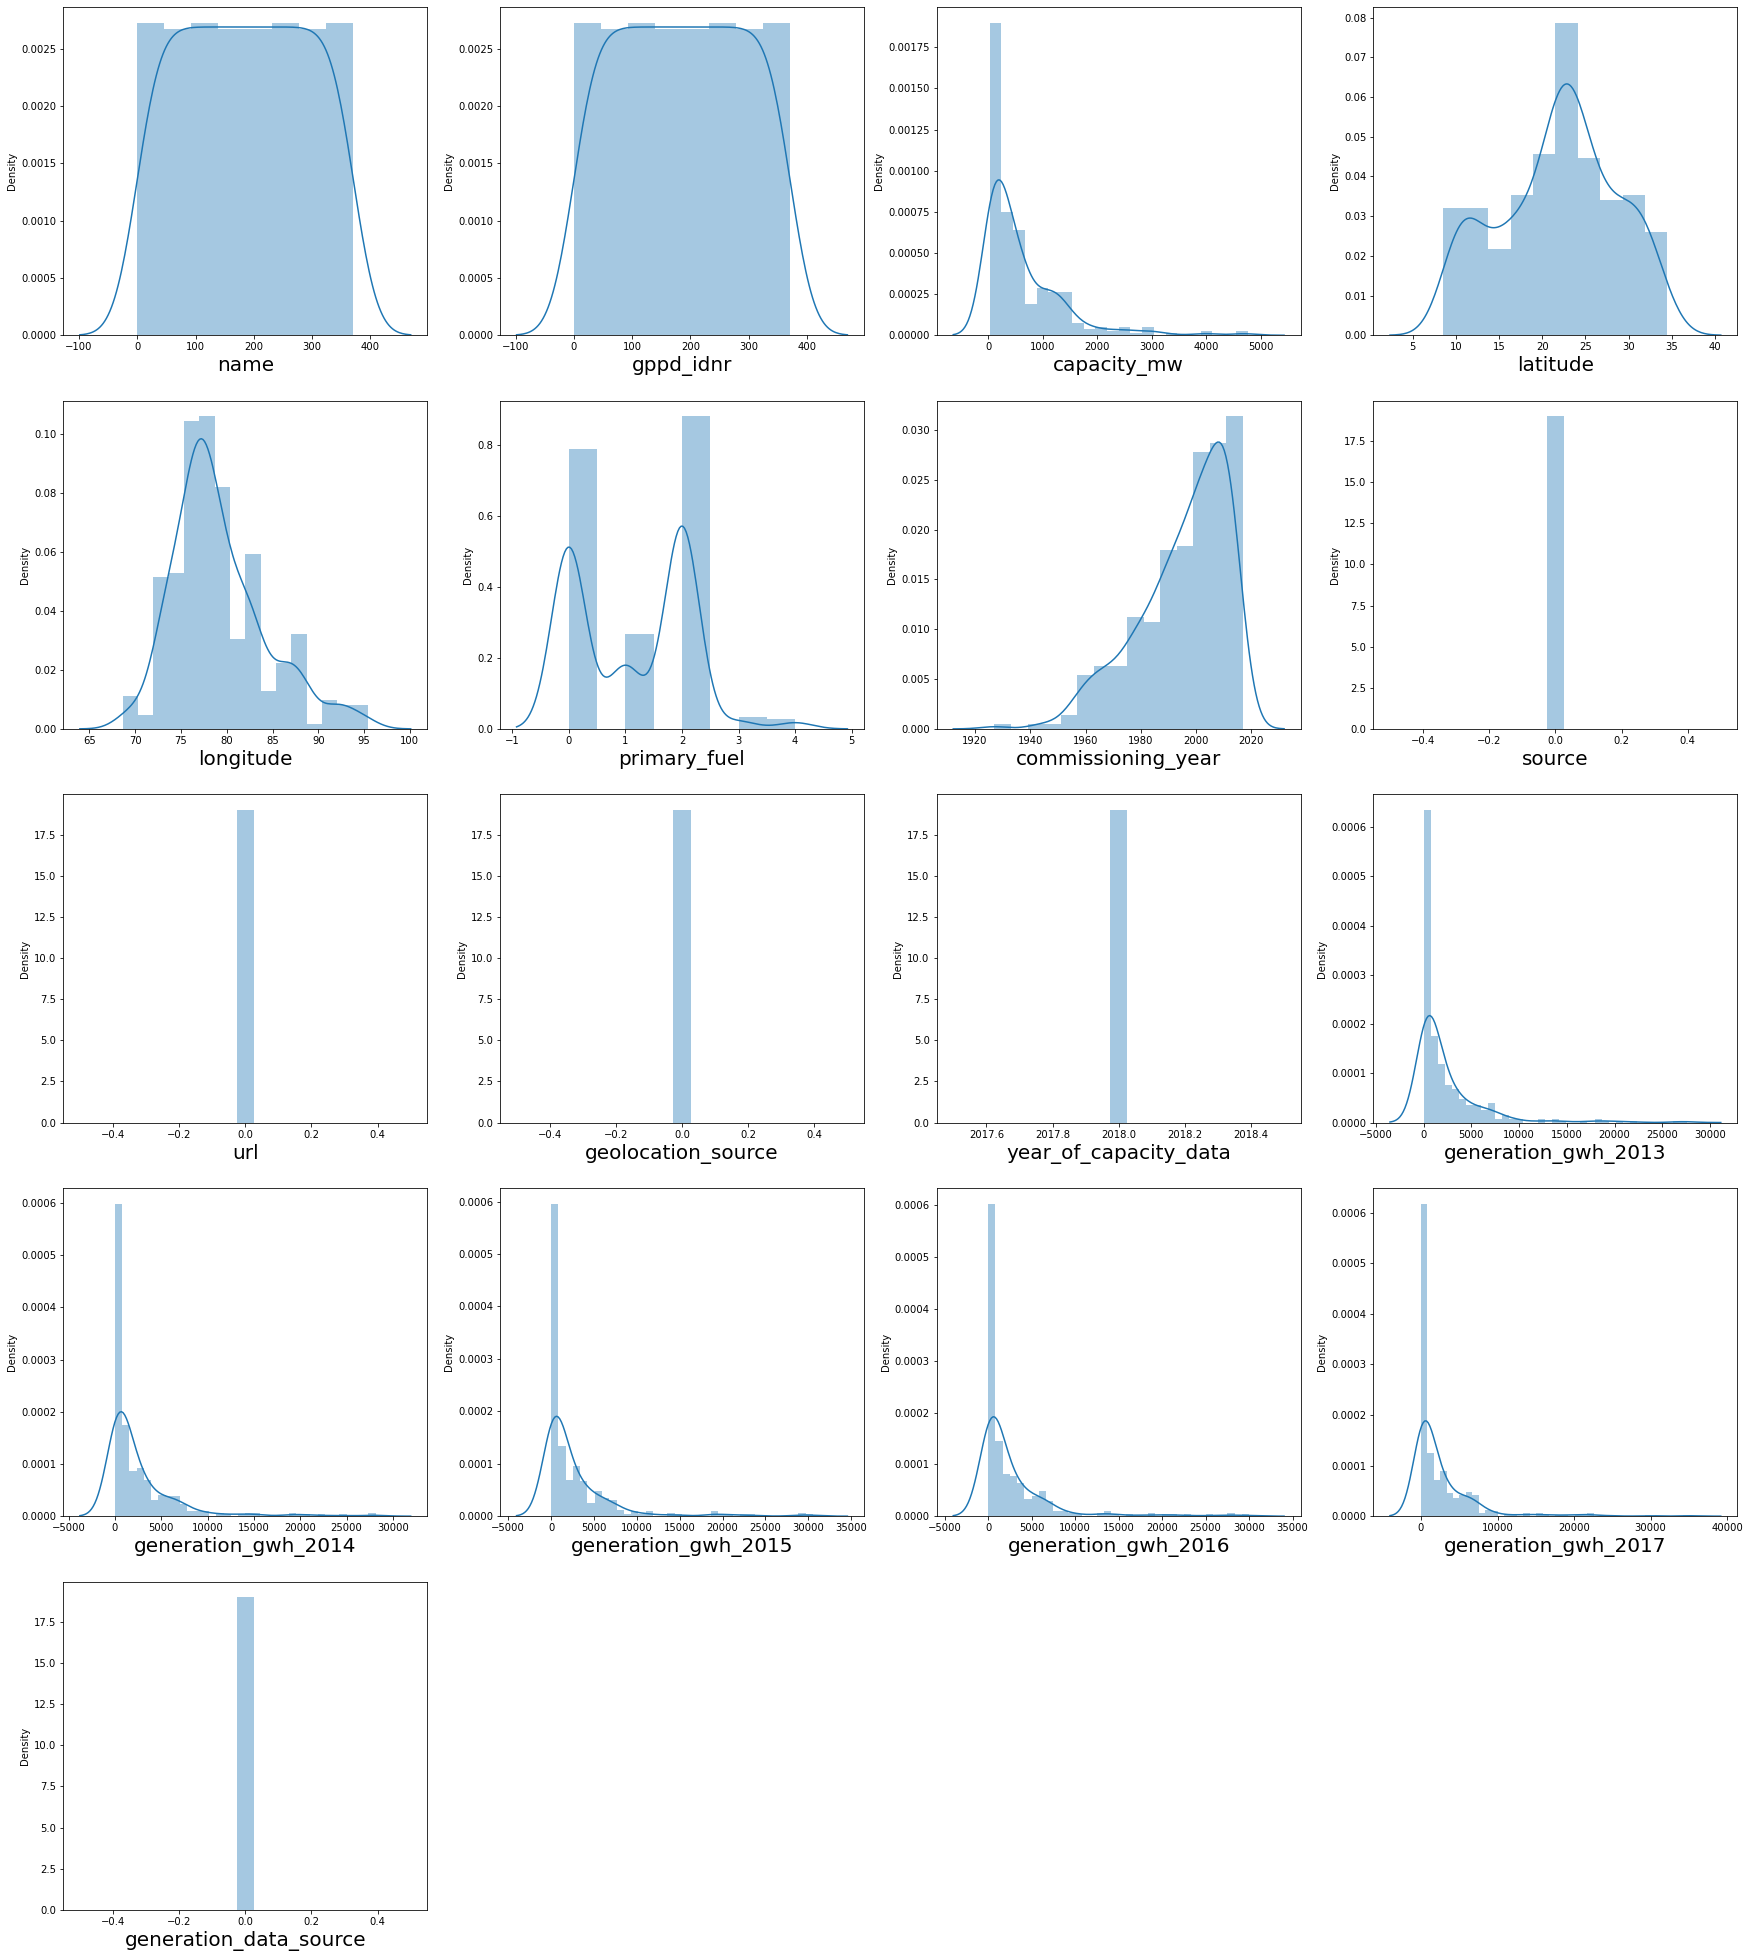

In [15]:
plt.figure(figsize=(30,35),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

#### capacity_mw,generation_gwh for all years have outliers,let's confirm it using boxplot.

#### url,year_of_capacity_data,geolocation_source,generation_data_source,source have only one entry throughout the data let's delete them.


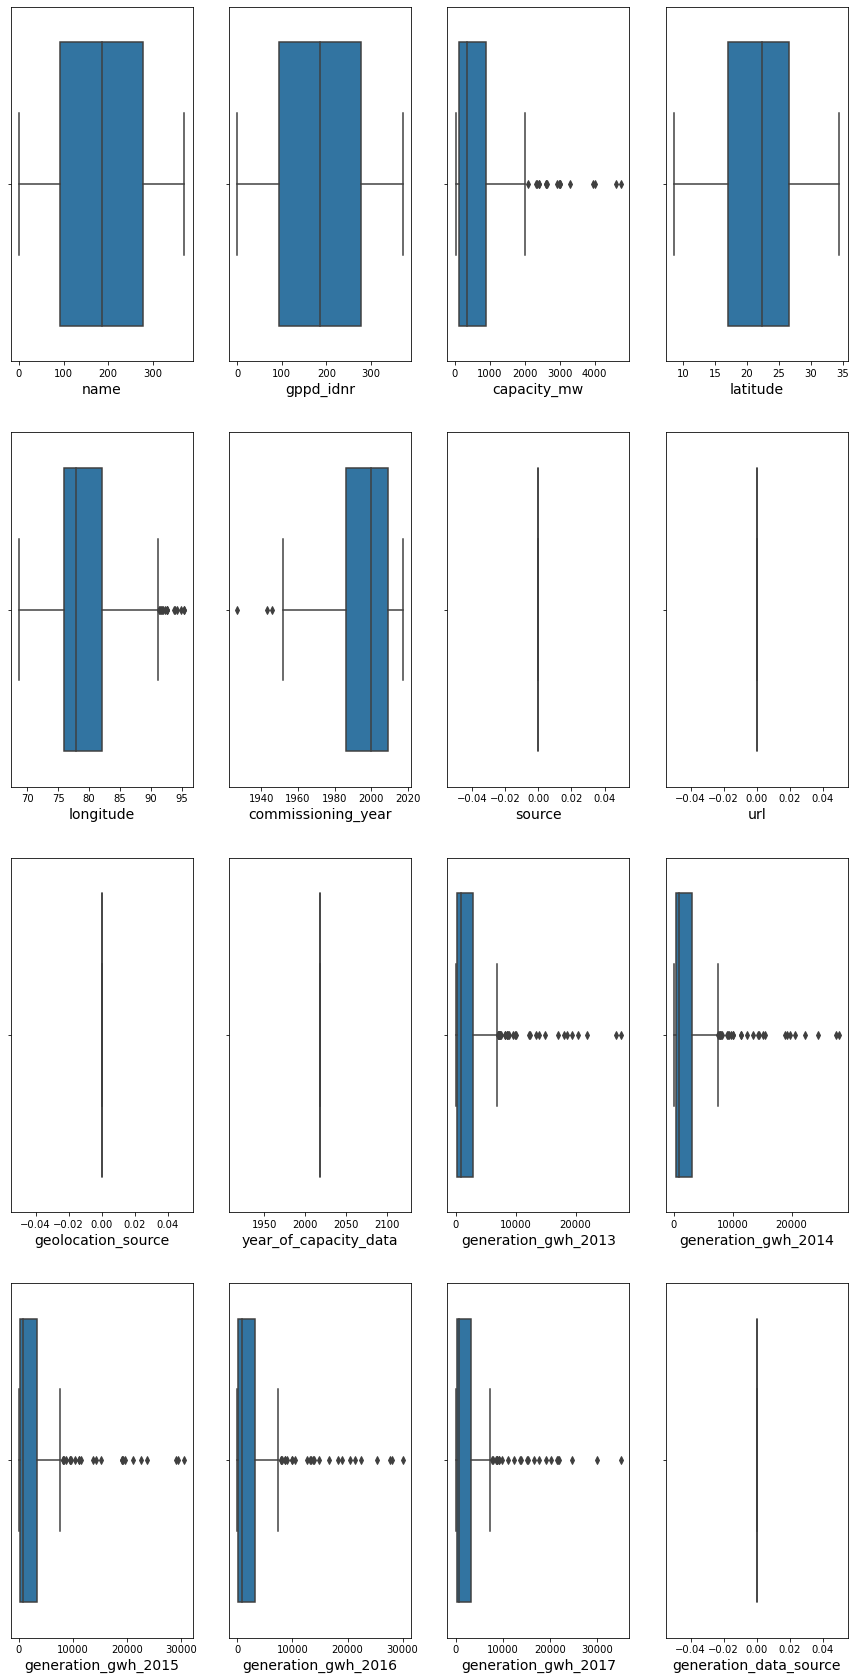

In [16]:
X=df.drop('primary_fuel',axis=1)
y=df.primary_fuel

#plotting outliers using boxplot
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(X[column],orient='V')
        plt.xlabel(column,fontsize=14)
    plotnumber+=1  
plt.show()

In [17]:
#longitude,capacity_mw,generation_gwh for all years have outliers.
#due to very less data we are not removing any outliers and keeping data as it is.

In [18]:
df.drop_duplicates()#dropping duplicates
df.drop(columns=['url','year_of_capacity_data','geolocation_source','generation_data_source','source'],axis=1,inplace=True)

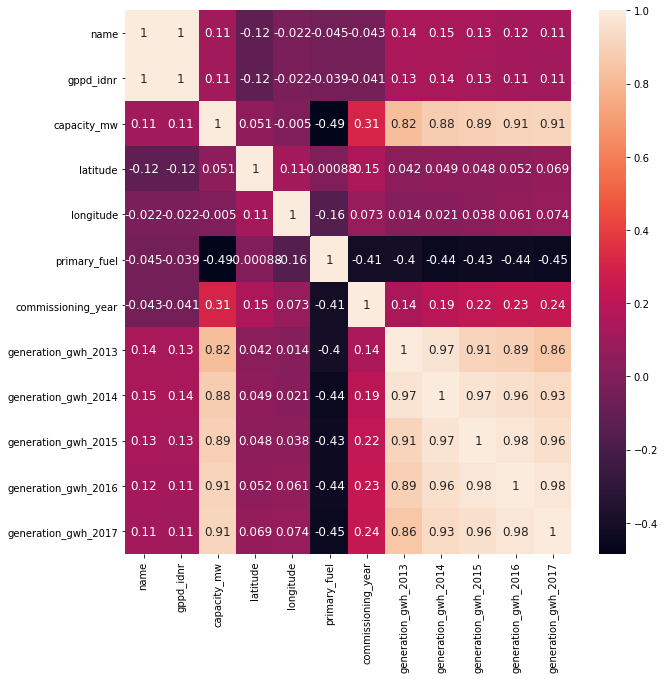

In [19]:
# check for multicollinearity
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True,annot_kws={'size':12})
plt.show()

Generation_gwh data fro each year is highly correlated with it's previous year data.

Primary_fuel is inversely proportional to all features except lattitude and longitude.

i'm not deleting any features further as we already have less records for each feature.

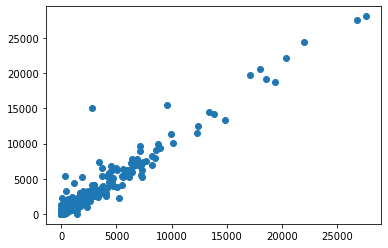

In [20]:
# Generation_gwh data fro each year is highly correlated with it's previous year data.
#Let's confirm it
plt.scatter(df['generation_gwh_2013'],df['generation_gwh_2014'])
plt.show()
#both are positivly correlated

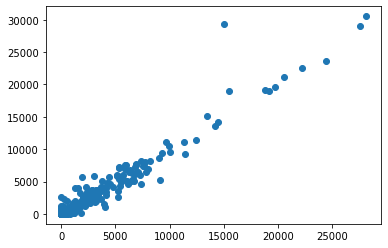

In [21]:
plt.scatter(df['generation_gwh_2014'],df['generation_gwh_2015'])
plt.show()
#both are positivly correlated

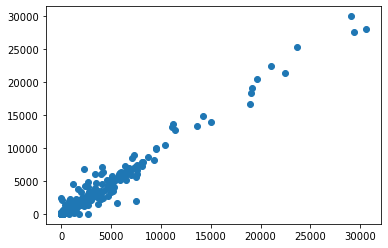

In [22]:
plt.scatter(df['generation_gwh_2015'],df['generation_gwh_2016'])
plt.show()
#both are positivly correlated

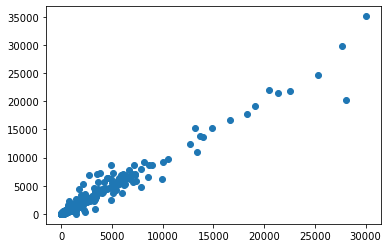

In [23]:
plt.scatter(df['generation_gwh_2016'],df['generation_gwh_2017'])
plt.show()
#both are positivly correlated

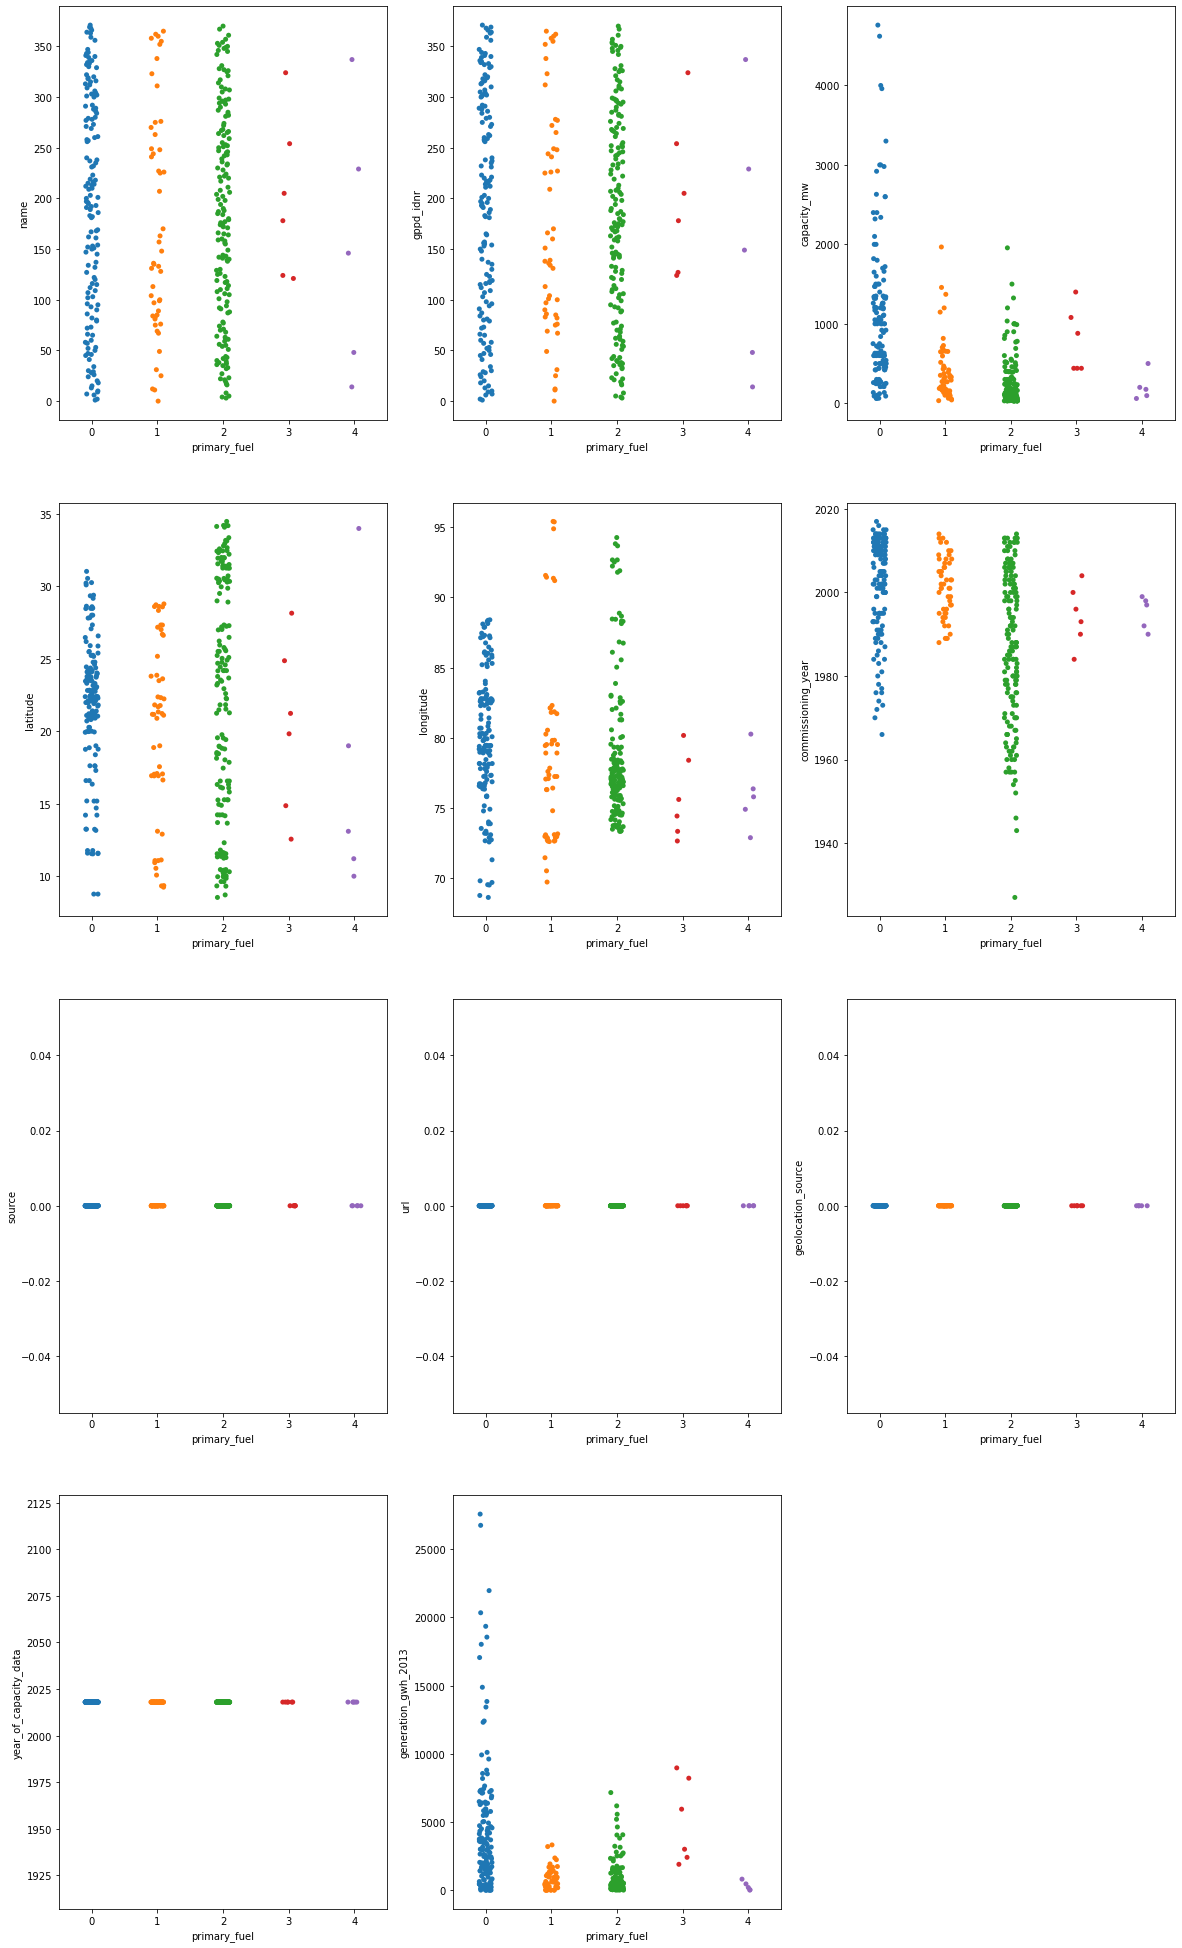

In [24]:
#visualizing data relation between feature and label
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
    
    plotnumber+=1
plt.show()

In [25]:
df.head(20)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,0,0,135.00,23.8712,91.3602,1,2004.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1,1,1800.00,21.9603,82.4091,0,2015.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
5,2,2,250.00,23.7689,68.6447,0,2005.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
6,3,3,60.00,10.4547,77.0078,2,1970.0,147.568450,157.558250,152.195200,61.421350,89.629600
7,4,4,192.00,32.2258,77.2070,2,2010.0,696.738800,674.391100,721.335200,675.724400,679.594950
8,5,5,290.00,16.3300,75.8863,2,2004.0,504.813250,480.594950,144.434200,402.029750,439.372100
9,6,6,210.00,23.1642,81.6373,0,2008.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000
10,7,7,1350.00,21.0782,77.9009,0,2014.0,1034.050000,1920.971000,5629.663000,1701.008000,4350.558000
11,8,8,134.00,31.2717,76.4938,2,1985.0,731.334950,614.412500,665.197300,670.500650,644.570950
12,9,9,1200.00,24.2007,82.8000,0,2011.0,6397.000000,7744.000000,8076.810500,7902.021600,7940.740000


In [26]:
X=df.drop('primary_fuel',axis=1)
y=df.primary_fuel

X.skew()#checking for skewness threshold +_.70


name                   0.000000
gppd_idnr              0.000000
capacity_mw            2.423485
latitude              -0.188749
longitude              0.898146
commissioning_year    -0.998011
generation_gwh_2013    3.368188
generation_gwh_2014    3.243565
generation_gwh_2015    3.516722
generation_gwh_2016    3.449785
generation_gwh_2017    3.542102
dtype: float64

In [27]:
#capacity_mw,longitude,commissioning_year,generation_gwh,have skewness ,let's treat using yeo-johnson.
from sklearn.preprocessing import power_transform
X_skew=power_transform(X,method='yeo-johnson')

In [28]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)

In [29]:
df.shape

(372, 12)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8303571428571429
[[40  0  7  0]
 [ 5  8  4  0]
 [ 1  1 45  0]
 [ 0  1  0  0]] 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.80      0.47      0.59        17
           2       0.80      0.96      0.87        47
           4       0.00      0.00      0.00         1

    accuracy                           0.83       112
   macro avg       0.62      0.57      0.58       112
weighted avg       0.82      0.83      0.82       112

Training score: 1.0
Testing score: 0.8303571428571429
Cross_validation_score: 0.7983783783783784


In [32]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
train_pred=svc.predict(X_train)
print("svc_training_score:",svc.score(X_train,y_train))
print("svc_testing_score:",svc.score(X_test,y_test))
pred_svc = svc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

svc_training_score: 0.8
svc_testing_score: 0.7589285714285714
accuracy_score : 0.7589285714285714
[[39  0  8  0]
 [ 6  0 11  0]
 [ 1  0 46  0]
 [ 0  1  0  0]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.00      0.00      0.00        17
           2       0.71      0.98      0.82        47
           4       0.00      0.00      0.00         1

    accuracy                           0.76       112
   macro avg       0.39      0.45      0.42       112
weighted avg       0.65      0.76      0.70       112

Cross_validation_score: 0.7445765765765767


In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.5
[[13  0 10 24  0]
 [ 3  0 13  1  0]
 [ 4  0 43  0  0]
 [ 0  0  0  0  0]
 [ 0  0  1  0  0]] 

              precision    recall  f1-score   support

           0       0.65      0.28      0.39        47
           1       0.00      0.00      0.00        17
           2       0.64      0.91      0.75        47
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.50       112
   macro avg       0.26      0.24      0.23       112
weighted avg       0.54      0.50      0.48       112

Training score: 0.47692307692307695
Testing score: 0.5
Cross_validation_score: 0.4996756756756757


In [34]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=xgb.predict(X_train)
print('Training score:',xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

[12:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8392857142857143
[[43  0  3  1  0]
 [ 5  6  4  0  2]
 [ 1  1 45  0  0]
 [ 0  0  0  0  0]
 [ 0  1  0  0  0]] 

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.75      0.35      0.48        17
           2       0.87      0.96      0.91        47
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.84       112
   macro avg       0.50      0.45      0.46       112
weighted avg       0.85      0.84      0.83       112

Training score: 1.0
Testing score: 0.8392857142857143
[12:04:05] WARNING: C:/Users/Admin

### Xgboost classifier is giving best accuracy and cross validation score,Let's tune parameters.

In [35]:
xgb.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [36]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]}

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=5, scoring='roc_auc')
gs2.fit(X_train, y_train)

[12:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [38]:
gs2.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.5,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [39]:
xgb=XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.5,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
xgb.fit(X_train,y_train)

[12:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.5,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [41]:
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))

0.8303571428571429
[[42  0  3  2  0]
 [ 4  7  4  0  2]
 [ 1  2 44  0  0]
 [ 0  0  0  0  0]
 [ 0  1  0  0  0]] 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.70      0.41      0.52        17
           2       0.86      0.94      0.90        47
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.83       112
   macro avg       0.49      0.45      0.46       112
weighted avg       0.84      0.83      0.83       112



### Predicting capacity_mw using regression

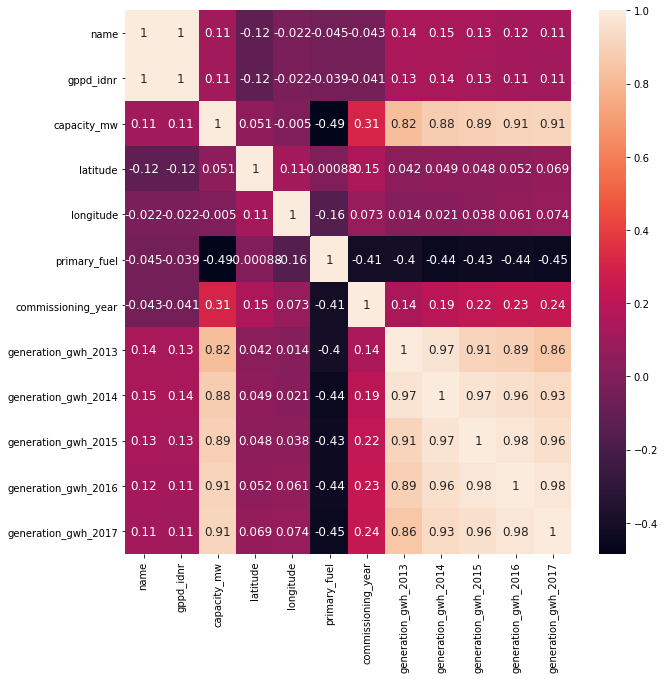

In [42]:
# check for multicollinearity
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True,annot_kws={'size':12})
plt.show()

capacity_mw is positivly related to generation_gwh for all the years

In [61]:
#checking correlation of features and target using corrwith
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw)

name                   0.111973
gppd_idnr              0.109067
latitude               0.050769
longitude             -0.005012
primary_fuel          -0.485162
commissioning_year     0.305064
generation_gwh_2013    0.821786
generation_gwh_2014    0.878885
generation_gwh_2015    0.894430
generation_gwh_2016    0.910223
generation_gwh_2017    0.914655
dtype: float64

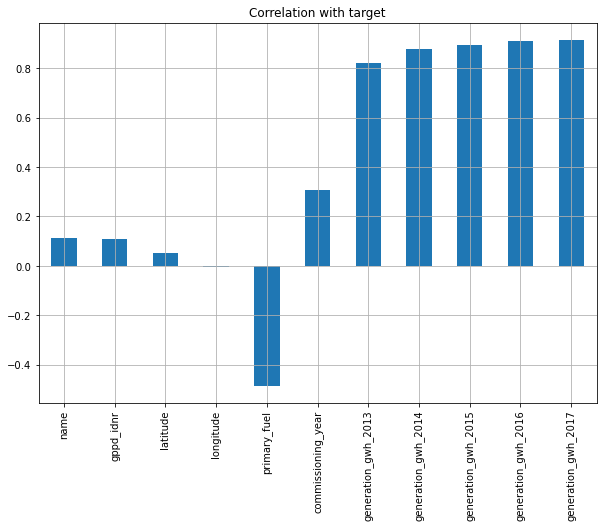

In [62]:
#visualising the correlation 
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw).plot(kind='bar',figsize=(10,7),title='Correlation with target',grid=True)
plt.show()

In [64]:
df1=df.drop(columns=['name','gppd_idnr','latitude','longitude'],axis=1)

In [76]:
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df1))
df_new = df1[(z<3).all(axis = 1)]
df_new

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,1,2004.0,631.777928,617.789264,843.74700,886.004428,663.774500
4,1800.0,0,2015.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736
5,250.0,0,2005.0,821.798000,1153.421000,1208.85200,1175.765000,1147.913000
6,60.0,2,1970.0,147.568450,157.558250,152.19520,61.421350,89.629600
7,192.0,2,2010.0,696.738800,674.391100,721.33520,675.724400,679.594950
...,...,...,...,...,...,...,...,...
883,400.0,2,2006.0,435.710500,1806.860300,1204.59675,2031.839750,2150.095500
890,1470.0,0,1986.0,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000
891,540.0,0,2010.0,2311.320000,1045.820000,1651.15890,1229.480000,999.170000
894,62.4,2,1991.0,203.975000,184.453100,183.00000,204.253600,175.866250


In [77]:
X=df_new.drop('capacity_mw',axis=1)
y=df_new.capacity_mw

X.skew()#checking for skewness threshold +_.70

primary_fuel           0.137121
commissioning_year    -0.807954
generation_gwh_2013    2.006304
generation_gwh_2014    1.901804
generation_gwh_2015    1.809791
generation_gwh_2016    1.951550
generation_gwh_2017    1.864024
dtype: float64

In [78]:
#capacity_mw,longitude,commissioning_year,generation_gwh,have skewness ,let's treat using yeo-johnson.
from sklearn.preprocessing import power_transform
X_skew=power_transform(X,method='yeo-johnson')

In [79]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

267.2849694582054
140644.5166390187
375.02602128254875


In [82]:
#adjusted r2_score train _data
print("Train_score:",lr.score(X_train,y_train))
#r2_score for test _data
print("Test_score:",lr.score(X_test,y_test))
#Model is neither overfit nor underfit

Train_score: 0.628321325290625
Test_score: 0.5209468924417905


In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(lr, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 351.0399246813911


### Random forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))


Mean_squared_error: 274.3681383944606
train_score: 0.9680326636670971
test_score: 0.7435939844207384


In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(rf, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 246.4409701204575


### SVM Regressor

In [86]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))


Mean_squared_error: 566.6178343705113
train_score: 0.9680326636670971
test_score: 0.7435939844207384


In [87]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(reg, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Cross_validation_Mean_squared_error: 525.5484590843337


### Kneighbors Regressor

In [88]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 280.0799946924334
train_score: 0.7699345756101175
test_score: 0.7328070247494436


In [89]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 274.7192453673456


### Bagging Regressor

In [90]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)
y_pred=bag_regressor.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 269.73400574732824
train_score: 0.7699345756101175
test_score: 0.7328070247494436


In [91]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(bag_regressor, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 247.93922641389082


### Ada Boost Regressor

In [92]:
from sklearn.ensemble import AdaBoostRegressor
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
y_pred=model_ABR.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 313.20587550448624
train_score: 0.7699345756101175
test_score: 0.7328070247494436


In [93]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model_ABR, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 299.74439745508465


### XGBoost Regressor

In [94]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

[19:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean_squared_error: 416.2212624490328
train_score: 0.7699345756101175
test_score: 0.7328070247494436


### Bagging Regressor is giving least error, let's try to tune parameters

In [96]:
bag_regressor.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [108]:
params={'n_estimators':[10,100,200,300,500]
       }

In [109]:
from sklearn.model_selection import RandomizedSearchCV
rdm_search=RandomizedSearchCV(bag_regressor,cv=5,param_distributions=params,n_jobs=-1)
rdm_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(random_state=1), n_jobs=-1,
                   param_distributions={'n_estimators': [10, 100, 200, 300,
                                                         500]})

In [110]:
rdm_search.best_estimator_

BaggingRegressor(n_estimators=300, random_state=1)

In [115]:
bag=BaggingRegressor(n_estimators=300, random_state=1)
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)

In [116]:
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 273.68632918297516
train_score: 0.7699345756101175
test_score: 0.7328070247494436


In [ ]:
#saving the model in local system
import pickle
filename='finalized_Capacity_mw.pickle'
pickle.dump(rf,open(filename,'wb'))